In [1]:
#import packages
from fft import *
#define self-correlation function using provided function np.fft.fft
def correlate(x_n, N):
    X_k = np.fft.fft(x_n, N)
    X_p = 1 / N * np.abs(X_k)**2
    corr = np.fft.ifft(X_p, N)
    return corr

## Exercise 3

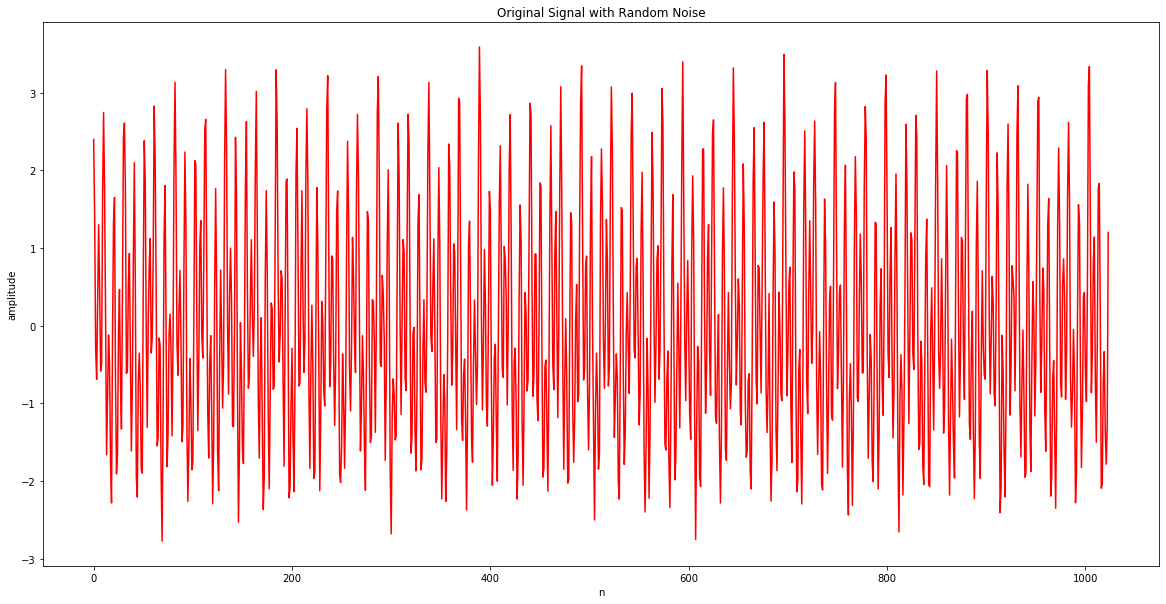

In [2]:
N = 1024
noise1 = 0.2 * np.random.randn(N)
x = np.arange(0, 2, 2 / N)
x_n = 0.8  * np.sin(2 * np.pi * 20 * x) + np.cos(50 * 2 * np.pi * x) + 1.5 * np.cos(100 * 2 * np.pi * x) + noise1
plt.figure(figsize=(20, 10))
plt.plot(np.arange(N), x_n, 'r-')
plt.xlabel('n')
plt.ylabel('amplitude')
plt.title('Original Signal with Random Noise')
plt.show()

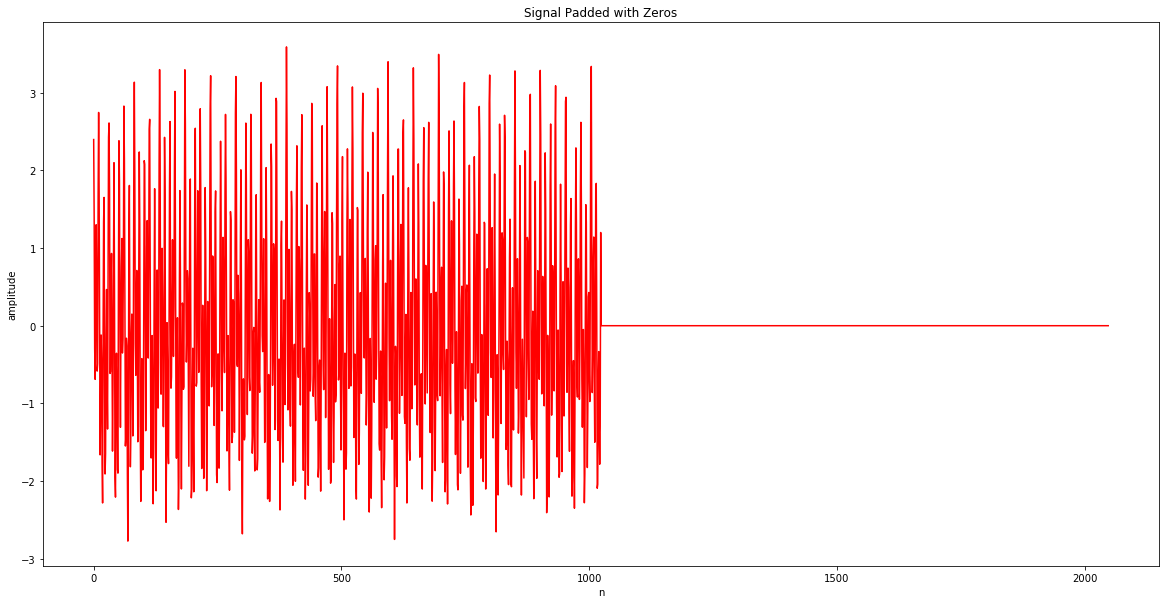

In [3]:
x_n_pad = np.append(x_n, np.zeros(N), axis=0)
x_pad  =  x_pad = np.arange(0, 4 * np.pi, 2 * np.pi / N)
plt.figure(figsize=(20, 10))
plt.plot(np.arange(2 * N), x_n_pad, 'r-')
plt.xlabel('n')
plt.ylabel('amplitude')
plt.title('Signal Padded with Zeros')
plt.show()

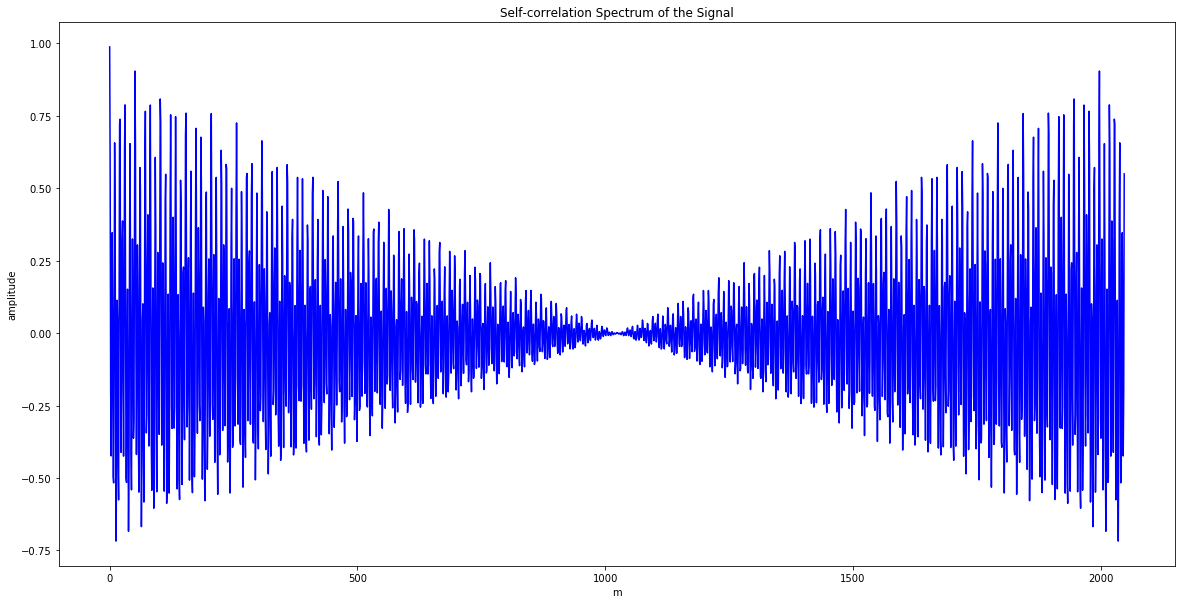

In [5]:
x_pad_corr = correlate(x_n_pad, 2 * N)
plt.figure(figsize=(20, 10))
plt.plot(np.arange(2 * N), x_pad_corr, 'b-')
plt.xlabel('m')
plt.ylabel('amplitude')
plt.title('Self-correlation Spectrum of the Signal')
plt.show()

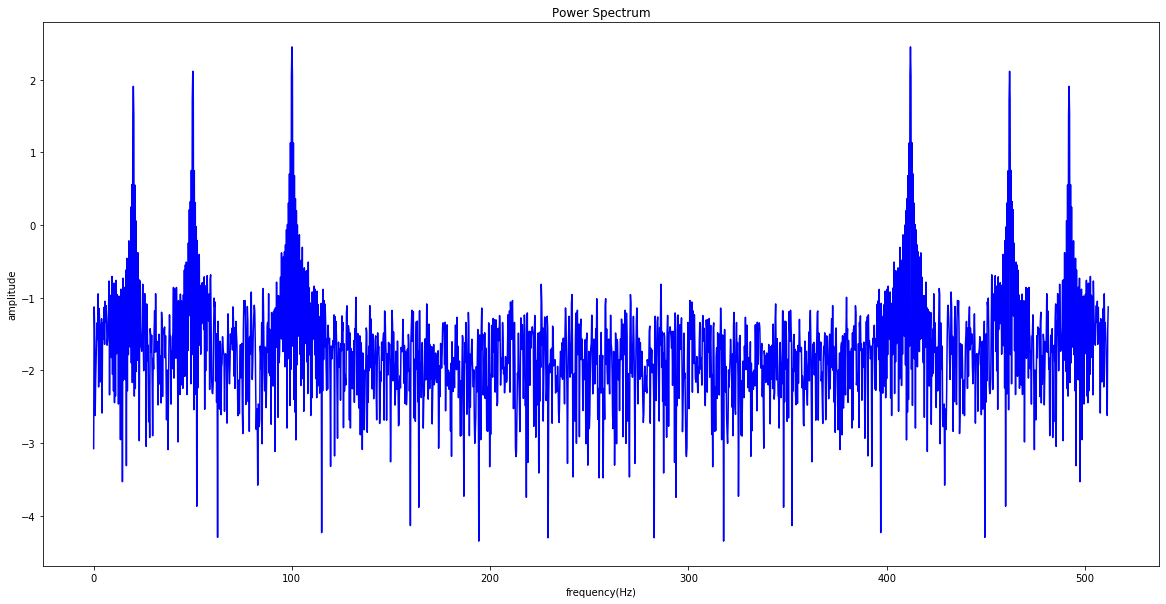

In [9]:
P_x = np.log10(np.abs(np.fft.fft(x_pad_corr)))
plt.figure(figsize=(20, 10))
plt.plot(np.arange(2 * N) / 4, P_x, 'b-')
plt.xlabel('frequency(Hz)')
plt.ylabel('amplitude')
plt.title('Power Spectrum')
plt.show()

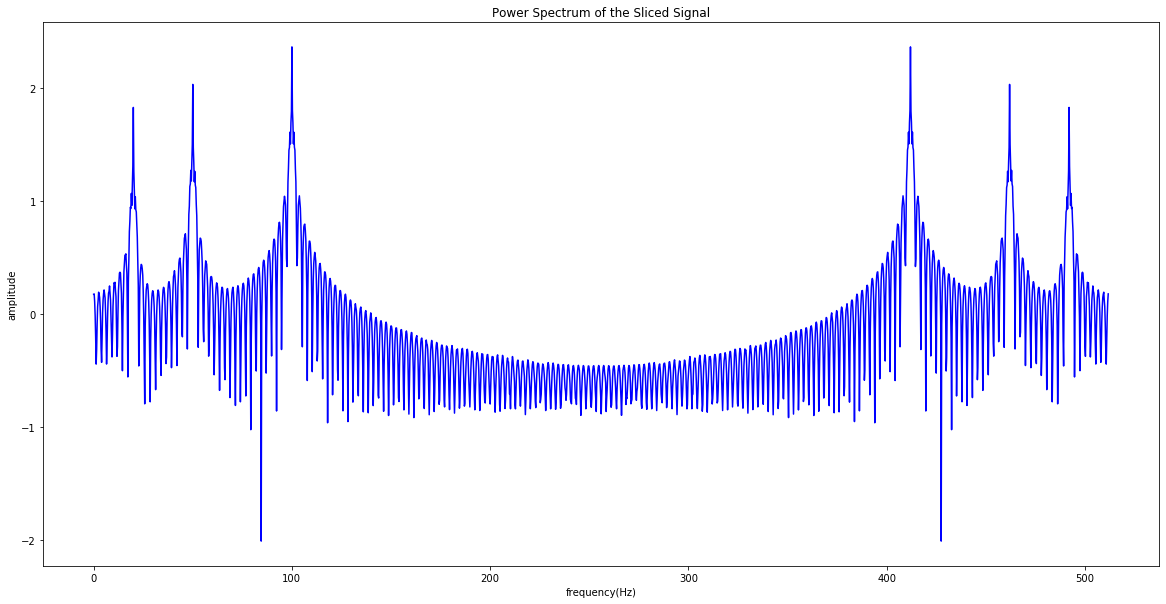

In [10]:
window_size = 100
x_pad_corr_cut = np.hstack((np.zeros(window_size), x_pad_corr[window_size:-window_size], np.zeros(window_size)))
P_x_cut = np.log10(np.abs(np.fft.fft(x_pad_corr_cut)))
plt.figure(figsize=(20, 10))
plt.plot(np.arange(2 * N) / 4, P_x_cut, 'b-')
plt.xlabel('frequency(Hz)')
plt.ylabel('amplitude')
plt.title('Power Spectrum of the Sliced Signal')
plt.show()

In [11]:
print('Variance of the Original Signal: ', np.var(P_x))
print('Variance of the Sliced Signal:', np.var(P_x_cut))

Variance of the Original Signal:  0.5936941283113868
Variance of the Sliced Signal: 0.2869365416836206


## Exercise 4

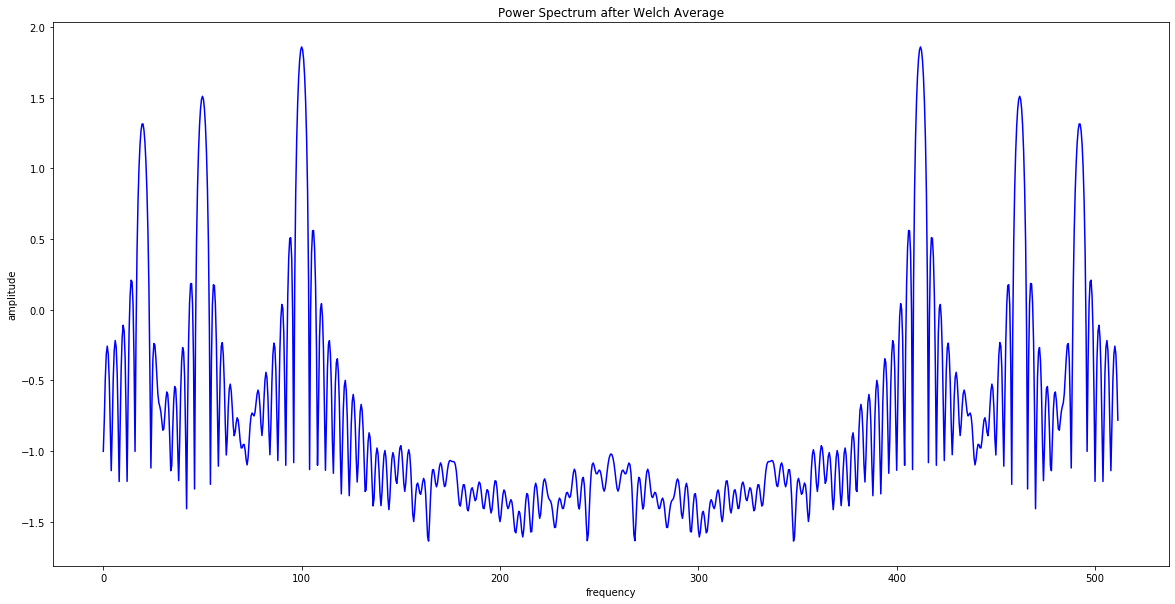

In [13]:
#Welch Average
N = 1024
noise2 = 0.2 * np.random.randn(N)
x = np.arange(0, 2, 2 / N)
x_n = 0.8 * np.sin(2 * np.pi * 20 * x) + np.cos(50 * 2 * np.pi * x) + 1.5 * np.cos(100 * 2 * np.pi * x) + noise2
M, overlap = 128, 64

def welch_average(x_n, N, M, overlap):
    n = int((N - overlap) / (M - overlap))
    P_x = np.zeros(N)
    for i in range(n):
        mask = np.zeros(N)
        mask[i * (M - overlap):i * (M - overlap) + M] = 1
        x_n_slice = x_n * mask
        P_x_slice = np.abs(np.fft.fft(x_n_slice))**2
        P_x += P_x_slice
    P_x /= M * n
    return np.log10(np.abs(P_x))

P_x = welch_average(x_n, N, M, overlap)
plt.figure(figsize=(20, 10))
plt.plot(np.arange(0, N) / 2, P_x, 'b-')
plt.xlabel('frequency')
plt.ylabel('amplitude')
plt.title('Power Spectrum after Welch Average')
plt.show()

In [14]:
print('Variance of the signal after Welch average: ', np.var(P_x))

Variance of the signal after Welch average:  0.5363521942099719


## Exercise 4

### Original Stats:
* Sample Frequency: 1/512 $s^{-1}$
* Time elapse: 2$s$
* Signal length: 1024 points

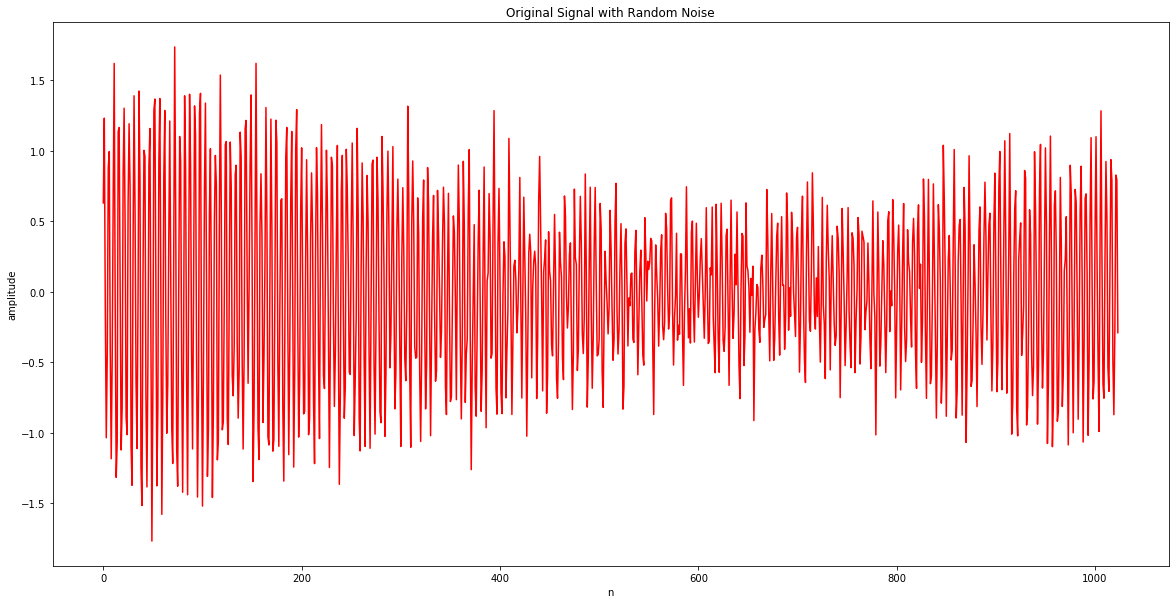

In [15]:
N = 1024
x = np.arange(0, 2, 2 / N)
x_n = 0.8 * np.sin(100 * 2 * np.pi * x) + 1.2 * np.cos(100.2 * 2 * np.pi * x) + 0.2 * np.random.randn(N)
plt.figure(figsize=(20, 10))
plt.plot(np.arange(N), x_n, 'r-')
plt.xlabel('n')
plt.ylabel('amplitude')
plt.title('Original Signal with Random Noise')
plt.show()

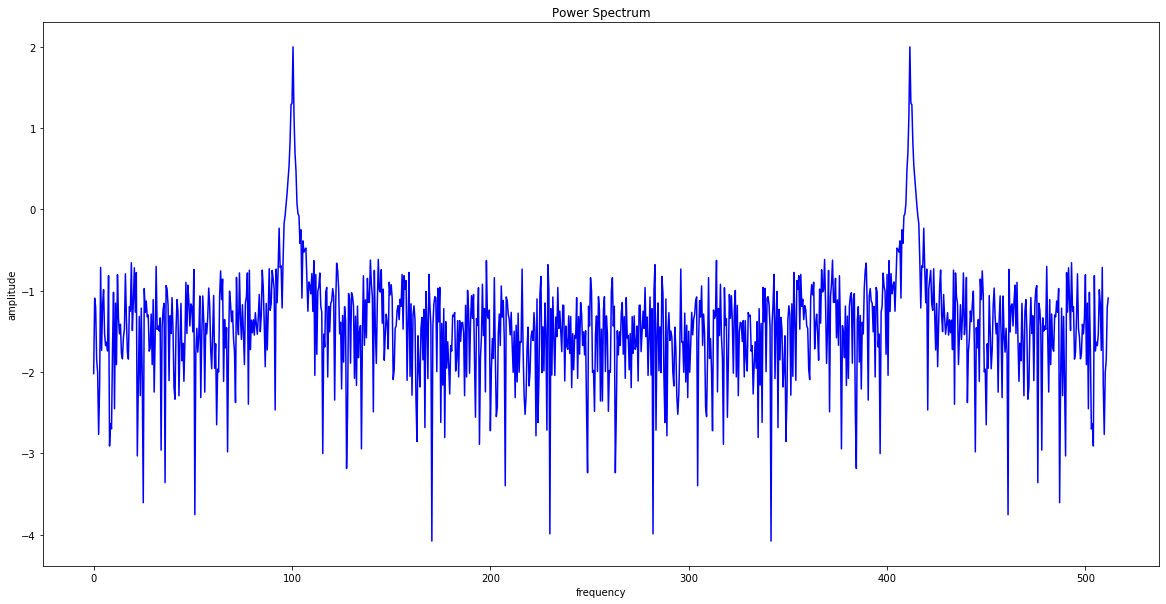

In [16]:
P_x = np.log10(1 / N * np.abs(np.fft.fft(x_n))**2)
x_freq = np.arange(0, N) / 2
plt.figure(figsize=(20, 10))
plt.plot(x_freq, P_x, 'b-')
plt.xlabel('frequency')
plt.ylabel('amplitude')
plt.title('Power Spectrum')
plt.show()

Unable to determine frequency 100Hz from frequency 100.2Hz

In [17]:
def power_spectrum_test(N, time, paddings=0):
    length = N + paddings
    if paddings:
        x1 = np.arange(0, time, time / N)
        x_n = np.append(0.8 * np.sin(100 * 2 * np.pi * x1) + 1.2 * np.cos(100.2 * 2 * np.pi * x1) + 0.2 * np.random.randn(N), np.zeros(paddings))
        x = np.arange(0, time + time / N * paddings, time / N)
        time += time / N * paddings
    else:
        x = np.arange(0, time, time / N)
        x_n = 0.8 * np.sin(100 * 2 * np.pi * x) + 1.2 * np.cos(100.2 * 2 * np.pi * x) + 0.2 * np.random.randn(N)
    P_x = np.log10(1 / N * np.abs(np.fft.fft(x_n))**2)
    x_freq = np.arange(0, length) / time
    plt.figure(figsize=(20, 10))
    #plt.plot(x_freq[:int(length / 2)], P_x[:int(length / 2)], 'b-')
    plt.plot(x_freq[int(90 * time):int(110 * time)], P_x[int(90 * time):int(110 * time)], 'b-')
    plt.xlabel('frequency')
    plt.ylabel('amplitude')
    plt.title(f'Power Spectrum (part)\nsample frequency {time / N}Hz, time elapse {time}s, padding {paddings} points')
    plt.show()

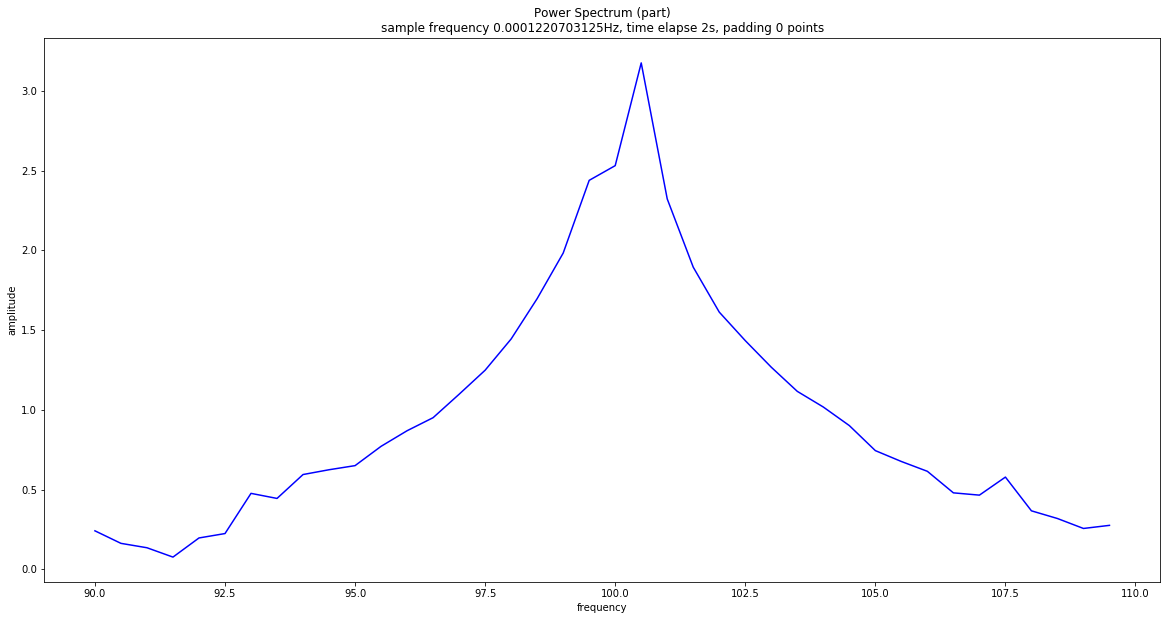

In [18]:
#Increase sample frequency
power_spectrum_test(1024 * 16, 2)

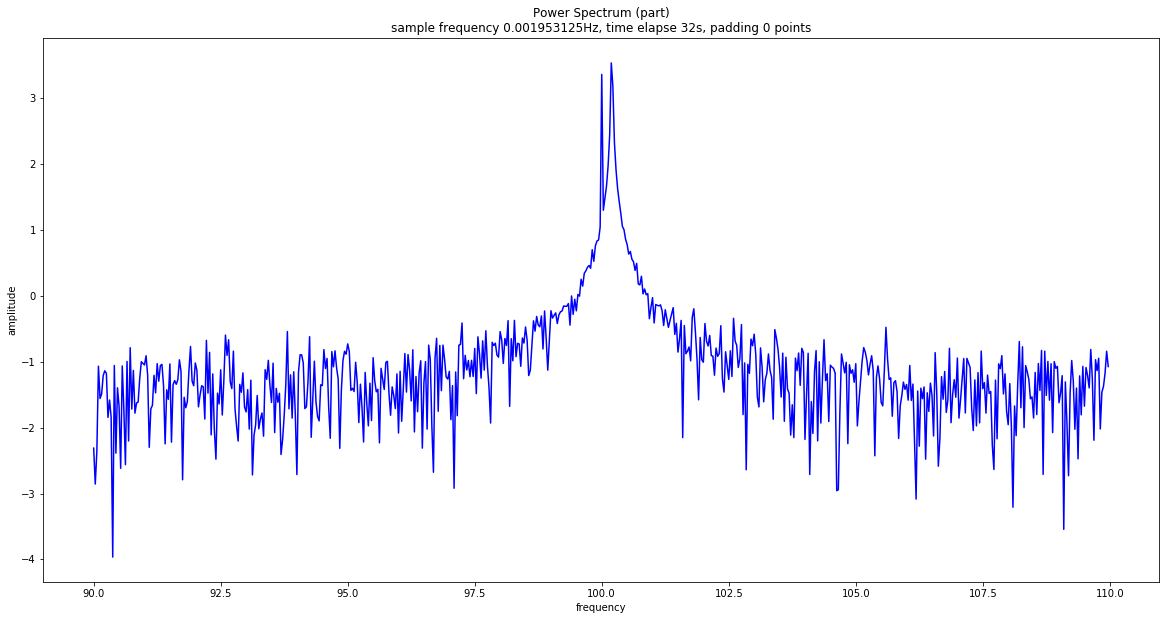

In [22]:
#Increase time elapse
power_spectrum_test(1024 * 16, 32)

In [26]:
N = 1024 * 16 * 5
time = 10
x = np.arange(0, time, time / N)
x_n = 0.8 * np.sin(100 * 2 * np.pi * x) + 1.2 * np.cos(100.2 * 2 * np.pi * x) + 0.2 * np.random.randn(N)
P_x = np.log10(1 / N * np.abs(np.fft.fft(x_n))**2)[:int(N / 2)]
peak1, peak2 = np.argsort(P_x)[-1] / time, np.argsort(P_x)[-2] / time
print(f'The first peak frequency is: {peak1}Hz')
print(f'The second peak frequency is: {peak2}Hz')

The first peak frequency is: 100.2Hz
The second peak frequency is: 100.0Hz


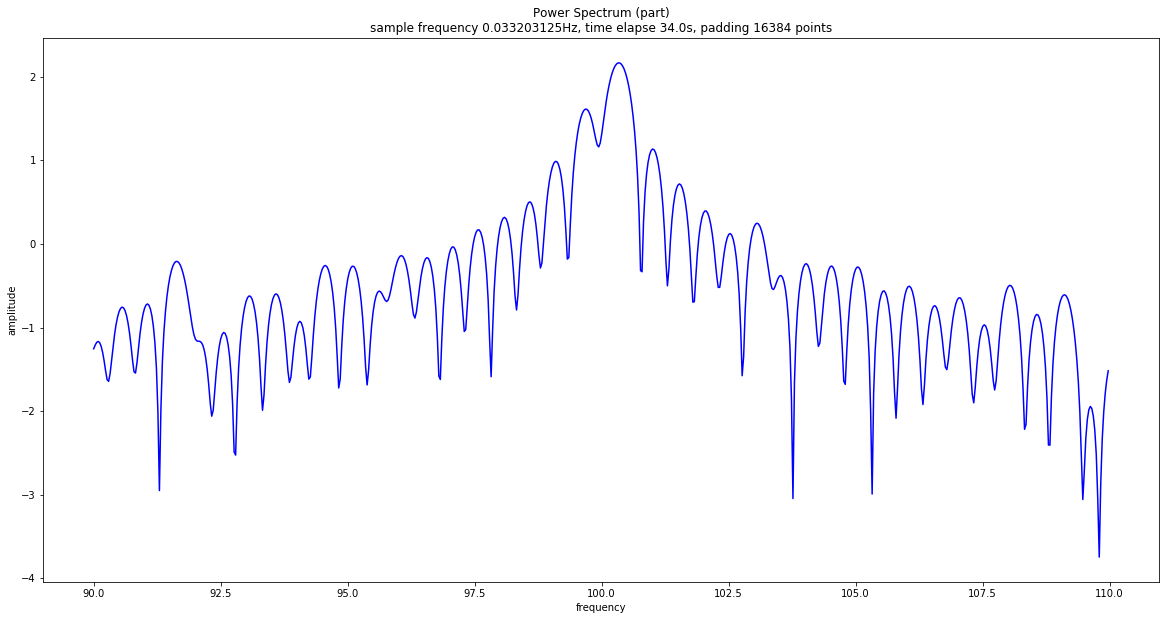

In [21]:
#Padding zeros
power_spectrum_test(1024, 2, paddings=1024 * 16)